In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import re

In [2]:
data = pd.read_csv('C:/Users/ASUS/Documents/GitHub/NAACP_summer2021/Entity_Recognition/People_Covered_in_the_News/people_2018.csv')
lemmatizer = WordNetLemmatizer()

In [3]:
def custom_standardization(df):

    spec_chars = ["!",'"',"#","%","&","'","(",")", "*","+",",",
                  "-",".","/",":",";","<", "=",">","?","@","[",
                  "\\","]","^","_", "`","{","|","}","~","–", 
                  "\xc2", "\xa0", "\x80", "\x9c", "\x99", "\x94", 
                  "\xad", "\xe2", "\x9d", "\n", "x9d", "xc2", "xa0", "x80", "x9c", "x99", "x94", 
                  "xad", "xe2"]

    for char in spec_chars:
        df['article'] = df['article'].str.strip()
        df['article'] = df['article'].str.replace(char, ' ')
        df['article'] = df['article'].str.lower()
        
    df['last_name'] = df['last_name'].str.lower()
    return df

data = custom_standardization(data)

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,last_name,article,article_id,race
0,martinez,in turn gifford’s bank granted martinez $200 ...,2015_1159,hispanic
1,pedro,but weep not for poor pedro,2015_46,hispanic
2,martinez,pedro martinez was determined to make a succes...,2015_1200,hispanic
3,williams,“if i’m a bad influence on the team then they...,2015_1159,white
4,ash,spectra has said but us representative stephe...,2015_409,white


In [5]:
data.columns = ['last_name', 'sentence', 'article_id', 'race']
data.head()

,last_name,sentence,article_id,race
0,martinez,in turn gifford’s bank granted martinez $200 ...,2015_1159,hispanic
1,pedro,but weep not for poor pedro,2015_46,hispanic
2,martinez,pedro martinez was determined to make a succes...,2015_1200,hispanic
3,williams,“if i’m a bad influence on the team then they...,2015_1159,white
4,ash,spectra has said but us representative stephe...,2015_409,white


In [6]:
def remove_names(sent, l_name):
    new_sent = ''
    temp = sent.split()
    for word in temp:
        if word == l_name:
            continue
        else:
            new_sent = new_sent + ' ' + word
    return new_sent.strip()

In [7]:
names = set(data.last_name.unique())
for name in names:
    data['sentence'] = data.apply(lambda x: remove_names(x['sentence'], name), axis=1)

In [8]:
# turn names list into a set so that search time is O(1)
# always work convert a list to a set if you need to look something up in a list
# use list only when the position of an element matters

black
lemmatizing done


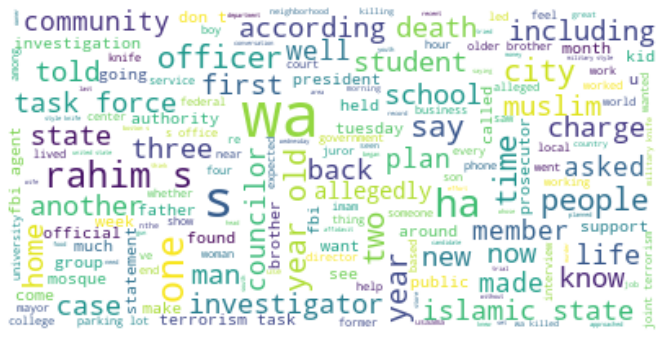

hispanic
lemmatizing done


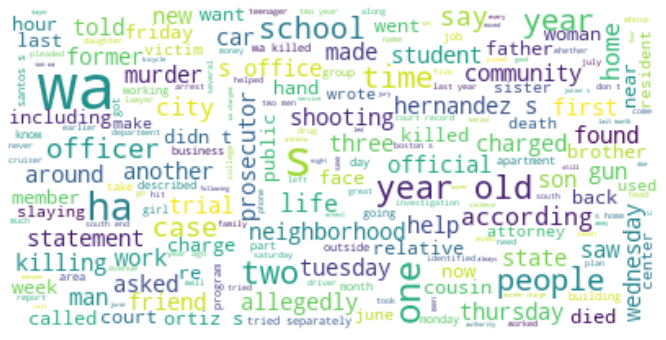

api
lemmatizing done


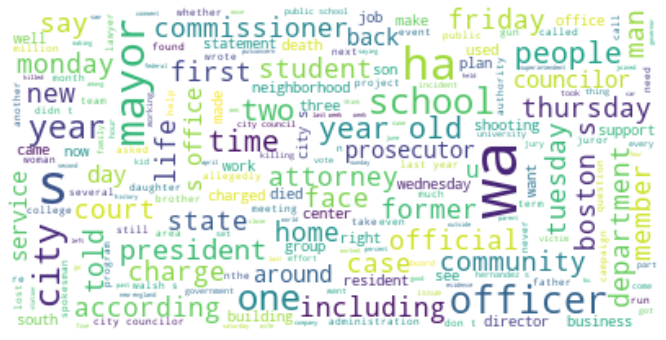

white
lemmatizing done


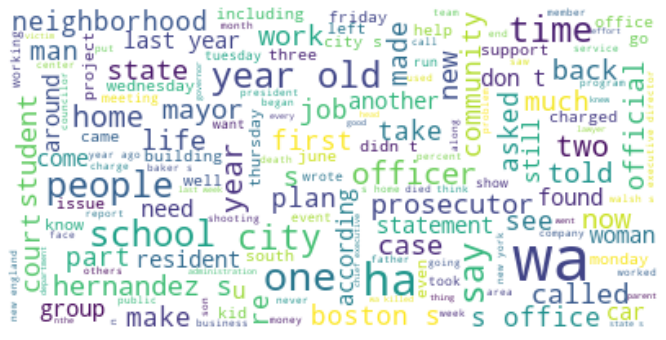

In [9]:
race_groups = data.groupby(data.race)
races = ['black', 'hispanic', 'api', 'white']

for i in range(len(data.race.unique())):
    temp = race_groups.get_group(races[i])
    print(races[i])
    
    documents = ''
    
    for row in temp.itertuples(index=False):
        words = row.sentence.split()
        for word in words:
            documents = documents + ' ' + lemmatizer.lemmatize(word)
    
    print('lemmatizing done')
    
    wordcloud = WordCloud(max_font_size=40, background_color='white').generate(documents)
    plt.figure(figsize=(15, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    wordcloud.to_file('C:/Users/ASUS/Documents/Github/NAACP_summer2021/Entity_Recognition/Most_Common_Words_Diff_Races/2018/' + races[i] + '.png')
    plt.show()

In [ ]:
# need another word cloud for each race which is the aggregate for all years
# use TF-IDF instead of frequency for word cloud
# for TF-IDF, document = race

In [ ]:
# prepare presentation for stats
# how many black, how many white, how many hispanic, how many asian
# neighborhood coverage
# group neighborhoods into black and white
# for each year, for each racial group, how many names are black, hispanic, asian, white

In [ ]:
# nlp class - first half = same as internship
# second half = deep learning 